In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv("iris.csv")

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("species",axis=1),dataframe["species"],test_size=0.3,random_state=0)

In [ ]:
standardscaler = StandardScaler()

In [ ]:
standardscaler.fit(X_treino)

StandardScaler()

In [ ]:
X_treino_medio = standardscaler.transform(X_treino)

In [ ]:
X_treino.head(3)

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5


In [ ]:
X_teste.head(3)

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2


In [ ]:
vetor_medio = X_treino.mean(axis=0)

In [ ]:
matriz_covariancia = np.cov((X_treino-vetor_medio).T)

In [ ]:
vetor_medio

sepal_length    5.893333
sepal_width     3.044762
petal_length    3.828571
petal_width     1.226667
dtype: float64

In [ ]:
matriz_covariancia

array([[ 0.76889744, -0.01402564,  1.39932692,  0.57046795],
       [-0.01402564,  0.19480403, -0.26994505, -0.09889744],
       [ 1.39932692, -0.26994505,  3.25648352,  1.36576923],
       [ 0.57046795, -0.09889744,  1.36576923,  0.61062821]])

In [ ]:
autovalor_covariancia,autovetor_covariancia = np.linalg.eig(matriz_covariancia)

In [ ]:
for i in range(len(autovalor_covariancia)):
    autovet_cov = autovetor_covariancia[:,i]
    print(f"Autovalor: {i+1}\n{autovalor_covariancia[i]}")
    print(100*"-")

Autovalor: 1
4.471667378005827
----------------------------------------------------------------------------------------------------
Autovalor: 2
0.26032685572748293
----------------------------------------------------------------------------------------------------
Autovalor: 3
0.07845684056149685
----------------------------------------------------------------------------------------------------
Autovalor: 4
0.020362112518385267
----------------------------------------------------------------------------------------------------


In [ ]:
razao_variancia = autovalor_covariancia/autovalor_covariancia.sum()

In [ ]:
razao_variancia

array([0.92565521, 0.05388883, 0.01624092, 0.00421505])

Text(0, 0.5, '%/ da variância explicada <=k')

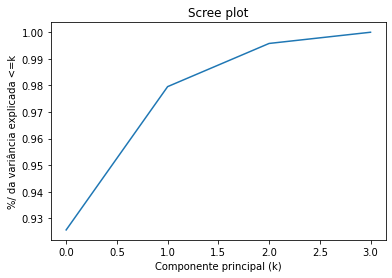

In [ ]:
plt.plot(np.cumsum(razao_variancia))
plt.title("Scree plot")
plt.xlabel("Componente principal (k)")
plt.ylabel("%/ da variância explicada <=k")

In [ ]:
dois_primeiros= autovetor_covariancia[:,:2].T

In [ ]:
np.dot(X_treino_medio,dois_primeiros.T)[:5,]

array([[-0.49600897,  2.37435082],
       [ 1.32554429, -0.12152815],
       [ 1.78636901, -0.68067114],
       [ 0.84923483,  1.5253799 ],
       [ 1.62627209,  0.6250707 ]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(X_treino)

PCA(n_components=2)

In [ ]:
pca.components_

array([[ 0.37728273, -0.06327444,  0.85151644,  0.35857195],
       [ 0.6239097 ,  0.75458673, -0.18351527, -0.08750834]])

In [ ]:
pca.get_covariance()

array([[ 0.76098605, -0.00627107,  1.39655599,  0.58674081],
       [-0.00627107,  0.18721126, -0.26747529, -0.11426156],
       [ 1.39655599, -0.26747529,  3.26300457,  1.35363475],
       [ 0.58674081, -0.11426156,  1.35363475,  0.61961131]])

In [ ]:
X_treino_medio = pd.DataFrame(X_treino_medio,columns=X_treino.columns)

In [ ]:
X_treino_medio.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.023664,-2.378463,-0.182950,-0.291459
1,0.695175,-0.101903,0.930661,0.737219
2,0.924353,0.581065,1.042022,1.637313
3,0.122229,-1.923151,0.652258,0.351465
4,0.924353,-1.240183,1.097702,0.737219
